In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df=pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [30]:
df.isnull().sum()


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [31]:
df_dup=df.duplicated().any()
print(df_dup)

False


In [32]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


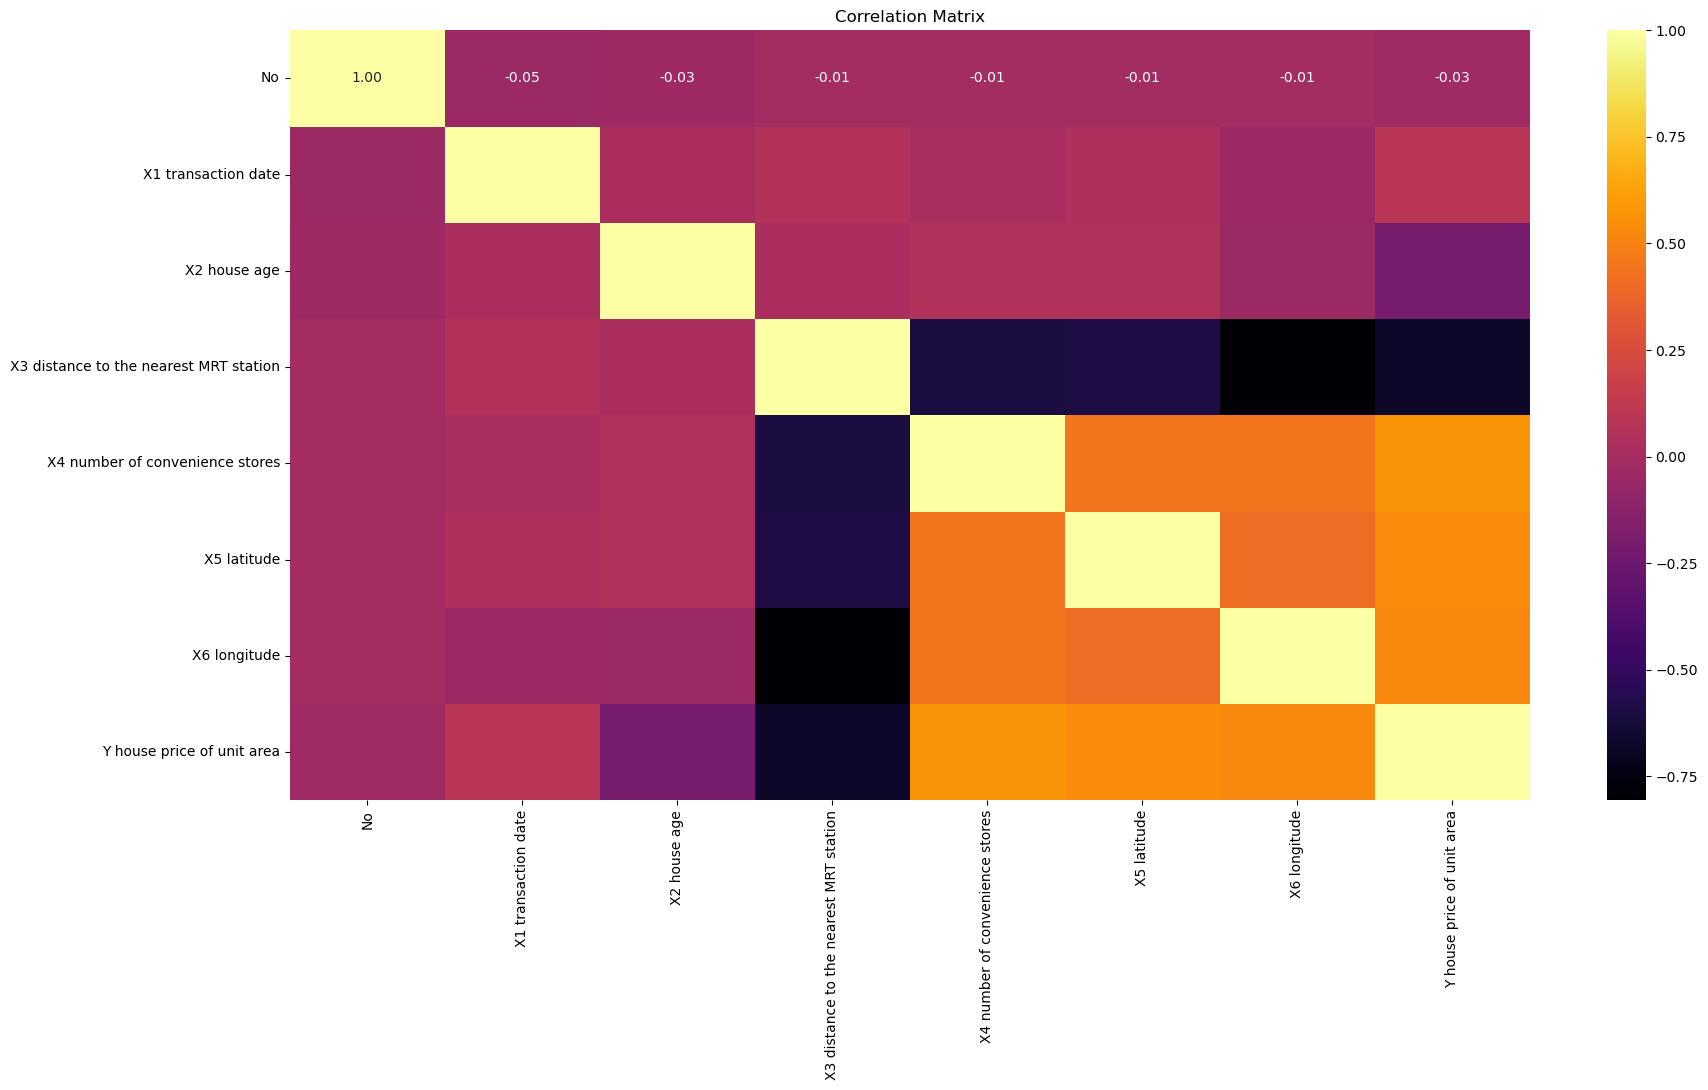

In [33]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='inferno')
plt.title('Correlation Matrix')
plt.show()


In [36]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

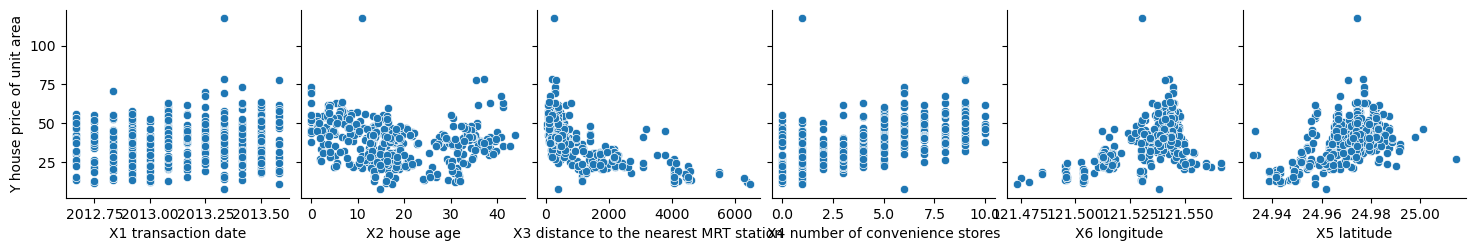

In [52]:

sns.pairplot(df, 
             x_vars=['X1 transaction date',
                     'X2 house age',
                     'X3 distance to the nearest MRT station',
                     'X4 number of convenience stores',
                     'X6 longitude',
                     'X5 latitude'],
             y_vars=['Y house price of unit area'])

plt.show()

In [60]:
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
X = df[features]
y = df['Y house price of unit area']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
302,2013.500,16.5,2288.01100,3,24.95885,121.51359
20,2013.417,4.5,2275.87700,3,24.96314,121.51151
303,2013.500,38.3,439.71050,0,24.97161,121.53423
142,2013.417,19.8,640.60710,5,24.97017,121.54647
14,2013.500,13.2,1164.83800,4,24.99156,121.53406
...,...,...,...,...,...,...
323,2013.417,28.6,197.13380,6,24.97631,121.54436
192,2013.167,43.8,57.58945,7,24.96750,121.54069
117,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,2013.583,35.9,640.73910,3,24.97563,121.53715


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)


In [65]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 59.52243531902899
R-squared: 0.6573242742217797


In [66]:
print('Coefficients:', model.coef_)


Coefficients: [ 5.02037302e+00 -2.63132611e-01 -4.46345490e-03  1.09258054e+00
  2.25488903e+02 -6.80648392e+00]
